## Regressão Linear - Predição da Idade

#### Importar Bibliotecas

In [875]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### ler train.csv e test.csv

In [876]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

#### transformar o Id do passageiro como index

In [877]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [878]:
train.set_index('PassengerId', inplace=True)

In [879]:
test.set_index('PassengerId', inplace=True)

#### Verificar shape

In [880]:
train.shape, test.shape

((891, 11), (418, 10))

#### Criar coluna Survived no test 

In [881]:
test['Survived'] = np.nan

In [882]:
train.shape, test.shape

((891, 11), (418, 11))

#### Concatenar train e test set

In [883]:
data = pd.concat([train,test],sort=False)

#### Traduzir colunas

In [884]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [885]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete','Tarifa', 'Cabine', 'Embarque']

#### Traduzir sexo

In [886]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female': 'mulher'})

In [887]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


#### Averiguando dados nulos

In [888]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

#### Remover cabine

In [889]:
data.drop('Cabine',axis=1,inplace=True)

In [890]:
data.head(2)

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Embarque
PassengerId,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C


#### Preencher nulos de Embarque com a moda

In [891]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [892]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [893]:
data['Embarque'].fillna(moda, inplace=True)

/tmp/ipykernel_3294/495367625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarque'].fillna(moda, inplace=True)


In [894]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

#### Preencher tarifa com a média

In [895]:
media = data['Tarifa'].mean()
media

33.29547928134557

In [896]:
data['Tarifa'].fillna(media,inplace=True)

/tmp/ipykernel_3294/2811563697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tarifa'].fillna(media,inplace=True)


In [897]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

#### Verificar correlações

<Axes: >

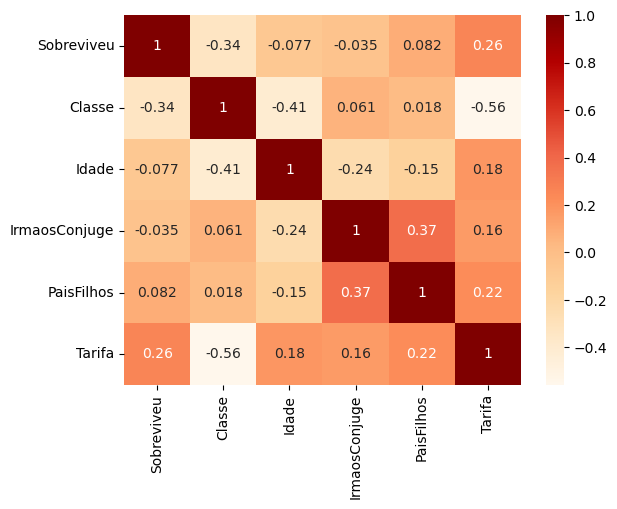

In [898]:
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='OrRd')

#### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com a Idade, e está faltando dados

In [899]:
print(data.columns)

Index(['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Embarque'],
      dtype='object')


In [900]:
data.drop('Sobreviveu', axis=1, inplace=True)

In [901]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Engenharia de Recursos I
Criar uma coluna "Titulo" baseando-se na coluna "Nome"
(mr, miss, dona, etc....)

In [902]:
data['Nome']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

In [903]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_3294/1018346682.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')


In [904]:
data['Titulo'].unique

<bound method Series.unique of PassengerId
1           Mr
2          Mrs
3         Miss
4          Mrs
5           Mr
         ...  
1305        Mr
1306      Dona
1307        Mr
1308        Mr
1309    Master
Name: Titulo, Length: 1309, dtype: object>

In [905]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [906]:
# A ideia aqui é modificar a coluna 'Titulo', substituindo títulos que não sejam 
# 'Miss', 'Master', 'Mr' ou 'Mrs' por 'Outros'.

# Usamos a função `apply` para aplicar uma função em cada valor da coluna.
data['Titulo'] = data['Titulo'].apply(
    # A função lambda é uma forma compacta de criar uma função anônima.
    # Aqui, verificamos se o título não está na lista dos títulos válidos ['Miss', 'Master', 'Mr', 'Mrs'].
    lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x
)

# Resumo:
# - Para cada valor de 'Titulo', se o título não for 'Miss', 'Master', 'Mr' ou 'Mrs',
#   ele será substituído por 'Outros'.
# - Caso contrário, ele mantém o valor original do título.

In [907]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


#### Traduzir Titulos

In [908]:
titulos_traduzidos = {
    'Master':'Menino',
    'Miss':'Solteira',
    'Mr':'HomemAdulto',
    'Mrs':'Casada'
}

In [909]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

#### Averiguar infos do dataframe

In [910]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


#### Remover BIlhete e NOme

In [911]:
data.drop(['Bilhete','Nome'],axis=1,inplace=True)

In [912]:
data.head(3)

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira


### Engenharia de Recursos II
Através da combinação: "Solteira" e está com "pais"

In [913]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.0,1,1,16.7000,S,Solteira
25,3,mulher,8.0,3,1,21.0750,S,Solteira
44,2,mulher,3.0,1,2,41.5792,C,Solteira
59,2,mulher,5.0,1,2,27.7500,S,Solteira
69,3,mulher,17.0,4,2,7.9250,S,Solteira


In [914]:
solteiras_com_pais['Idade'].mean()

12.178815789473685

#### Verificar distribuição de idades

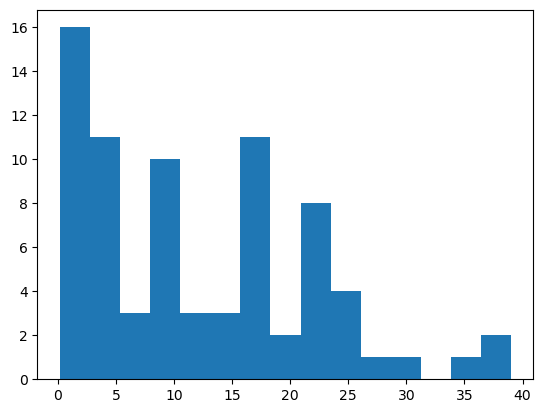

In [915]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

#### Média de mulheres solteiras

In [916]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

#### Distribuição das idades de mulheres solteiras

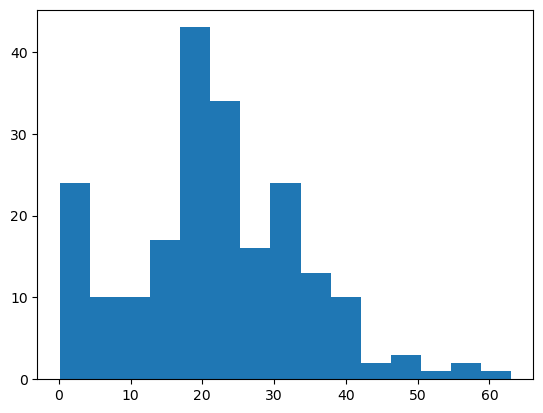

In [917]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show()

#### Média de idade de mulheres casadas

In [918]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

#### Distribuição das idades de mulheres casadas

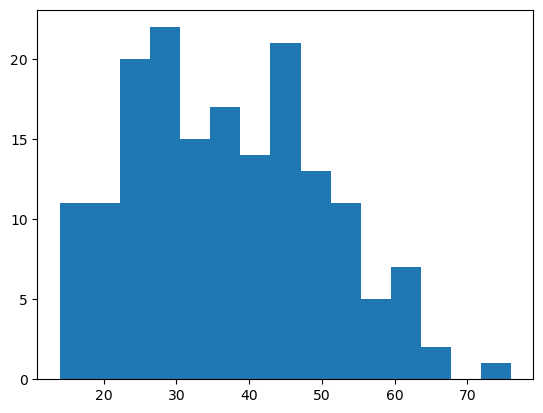

In [919]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show()

#### Adicionar coluna "solteira com pais"

In [920]:
solteiras_com_pais.index

Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,  173,
        181,  185,  206,  230,  234,  238,  298,  312,  319,  330,  342,  357,
        375,  382,  410,  418,  420,  436,  437,  447,  449,  470,  480,  486,
        531,  536,  540,  541,  542,  543,  581,  586,  594,  616,  619,  635,
        643,  645,  652,  690,  692,  703,  721,  743,  751,  793,  814,  836,
        853,  854,  864,  889,  918,  944,  945, 1009, 1017, 1032, 1067, 1078,
       1080, 1095, 1106, 1130, 1142, 1155, 1175, 1176, 1188, 1218, 1246, 1277,
       1294, 1301],
      dtype='int64', name='PassengerId')

In [921]:
data['solteira_com_pais'] = 0

In [922]:
# Percorremos cada índice (idx) e linha (_) do DataFrame 'data' usando iterrows().
# A variável _ é usada apenas porque não precisamos dos valores da linha, apenas dos índices.
for idx, _ in data.iterrows():  
   
    # Verificamos se o índice atual (idx) está presente no índice do DataFrame 'solteiras_com_pais'.
    # Isso significa que essa linha corresponde a uma pessoa solteira que está com os pais.
    if idx in solteiras_com_pais.index:  
        
        # Se a condição for verdadeira, atribuimos o valor 1 na coluna 'solteira_com_pais'
        # para indicar que essa pessoa se encaixa no critério.
        data['solteira_com_pais'].at[idx] = 1


In [923]:
data['solteira_com_pais']

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: solteira_com_pais, Length: 1309, dtype: int64

In [924]:
data.loc[data['solteira_com_pais']==1]['Idade'].mean()

12.178815789473685

In [925]:
data.loc[data['solteira_com_pais']==1]['Idade']

PassengerId
11       4.00
25       8.00
44       3.00
59       5.00
69      17.00
        ...  
1218    12.00
1246     0.17
1277    24.00
1294    22.00
1301     3.00
Name: Idade, Length: 86, dtype: float64

#### Transformar recursos categóricos em dummies

In [926]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


In [927]:
# Identifica colunas categóricas automaticamente
colunas_categoricas = data.select_dtypes(include=['object', 'category']).columns
print("Colunas categóricas:", colunas_categoricas)

Colunas categóricas: Index(['Sexo', 'Embarque', 'Titulo'], dtype='object')


In [928]:
data = pd.get_dummies(data, columns=colunas_categoricas, drop_first=True)

In [929]:
data.head()

,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa,solteira_com_pais,Sexo_mulher,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,False,False,True,True,False,False
2,1,38.0,1,0,71.2833,0,True,False,False,False,False,False
3,3,26.0,0,0,7.9250,0,True,False,True,False,False,True
4,1,35.0,1,0,53.1000,0,True,False,True,False,False,False
5,3,35.0,0,0,8.0500,0,False,False,True,True,False,False


In [930]:
data.shape

(1309, 12)

### Separar train e test para idades
- Treinar com dados não nulos
- Aplicar modelo em dados nulos

In [931]:
data.isnull().sum()

Classe                  0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteira_com_pais       0
Sexo_mulher             0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [932]:
train_idade = data.dropna()

In [933]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade',axis=1)

In [934]:
test_idade

,Classe,IrmaosConjuge,PaisFilhos,Tarifa,solteira_com_pais,Sexo_mulher,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,
6,3,0,0,8.4583,0,False,True,False,True,False,False
18,2,0,0,13.0000,0,False,False,True,True,False,False
20,3,0,0,7.2250,0,True,False,False,False,False,False
27,3,0,0,7.2250,0,False,False,False,True,False,False
29,3,0,0,7.8792,0,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,0,7.7208,0,True,True,False,False,False,True
1302,3,0,0,7.7500,0,True,True,False,False,False,True
1305,3,0,0,8.0500,0,False,False,True,True,False,False


In [935]:
train_idade.shape, test_idade.shape

((1046, 12), (263, 11))

#### Definir X e y para treinar o modelo

In [936]:
X = train_idade.drop('Idade', axis=1)

In [937]:
y = train_idade['Idade']

In [938]:
X.shape, y.shape

((1046, 11), (1046,))

#### Importar modelo regressivo

In [939]:
from sklearn import linear_model

#### Instanciar modelo

In [940]:
lm = linear_model.LinearRegression()

#### Importar train_test_split para preparar para treino

In [941]:
from sklearn.model_selection import train_test_split

#### Dividir 70% para treinar, 30% para testar

In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#### Treinar modelo

In [943]:
X_train.shape, y_train.shape

((732, 11), (732,))

In [944]:
X_test.shape, y_test.shape

((314, 11), (314,))

In [945]:
lm.fit(X_train, y_train)

LinearRegression()

In [946]:
X_test.shape, y_test.shape

((314, 11), (314,))

#### Fazer predição

In [947]:
pred = lm.predict(X_test)

#### Importar mean_squared_error

In [948]:
from sklearn.metrics import mean_squared_error

#### Averiguar score

In [949]:
lm.score(X_test, y_test)

0.4747705920976395

#### Averiguar rmse

In [950]:
mse = mean_squared_error(y_test, pred)

In [951]:
rmse = np.sqrt(mse)
rmse

10.421287799894568

#### Visualizar resíduos em scatterplot

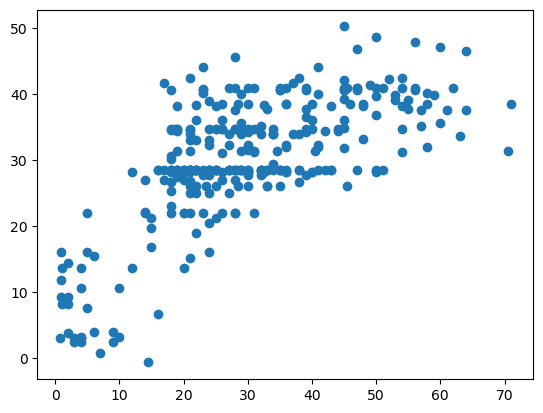

In [952]:
plt.scatter(y_test, pred)
plt.show()

#### Aplicar modelo nos dados nulos

In [953]:
test_idade.shape

(263, 11)

In [954]:
pred_idade = lm.predict(test_idade)

In [955]:
pred_idade

array([31.3872961 , 34.64787989, 26.59714597, 26.0405899 , 24.97560111,
       28.43651461, 38.1258302 , 24.97572488, 26.04058587, 26.03994728,
       28.43636688, 30.61016734, 24.97572488, 24.48597716, 40.84258032,
       38.45346533,  0.70025934, 28.43651461, 28.43636688, 24.97568896,
       28.43636688, 28.43636688, 28.43651461, 28.43663033, 24.18963104,
       28.43636688, 31.38797464,  5.77737141, 29.92590561, 28.4370734 ,
       28.43578012, -0.67965465, 43.04867745, 40.851753  ,  1.54626934,
        4.40427107, 32.24934871, 40.82868958, 31.16672341, 31.38797464,
       24.97572488, 25.5508309 , 30.6175917 , 28.43651461,  6.63019506,
       22.02459612, 18.85103176, 24.19791758, 28.43713327, 38.96070526,
       31.38797464, 24.97572488, 40.84689124, 24.97572488, 34.66033366,
       40.85168115, 38.45346533, 40.84737023, 24.97572488, 29.83236004,
       31.18757319, 28.43636688, 31.9615474 , 25.5508309 , 23.42011028,
       40.53472752, 28.43651461, 28.21482826, 40.84305931, 26.04

#### Criar coluna idade contendo as predições

In [956]:
test_idade['Idade'] = pred_idade

In [957]:
test_idade.isnull().sum()

Classe                0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Sexo_mulher           0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

In [958]:
test_idade.shape, train_idade.shape

((263, 12), (1046, 12))

#### Concatenar dados

In [959]:
idade = pd.concat([train_idade, test_idade], sort=False)

#### Criar dataframe ocntendo IdPassageiro e Idade

In [960]:
idade_completa = pd.DataFrame({
    'IdPassageiro':data.index,
    'Idade':idade['Idade']
})

In [961]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1305,24.975753
1302,1306,24.975725
1305,1307,28.436367


#### Salvar CSV com idade completa

In [962]:
idade_completa.to_csv('idade_completa.csv', index=False)